In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import StandardScaler 


In [2]:
train = pd.read_csv('Resources/train_allvalues.csv')


In [3]:
train.drop(columns=['Id','MiscVal','PoolArea'], inplace=True)

In [4]:
#just one row which is not marked 'AllPub' lets evaluate 
train[train['Utilities']!='AllPub']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
916,20,RL,90.418605,14375,Pave,IR1,Lvl,NoSeWa,CulDSac,Gtl,...,118,0,0,233,none,1,2009,COD,Abnorml,137500


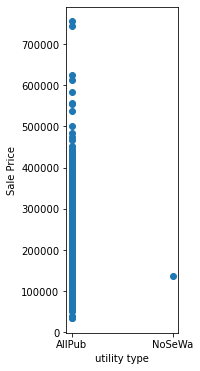

In [5]:
#clearly that variable lowered the price. We will keep the utilties column 

fig,ax = plt.subplots(figsize=(2,6))

ax.scatter(x=train.Utilities, y = train['SalePrice'])
plt.xlabel("utility type")
plt.ylabel("Sale Price")
plt.show()

In [6]:
train['SaleCondition'].value_counts()

Normal     1159
Partial     122
Abnorml     100
Family       20
Alloca        8
AdjLand       3
Name: SaleCondition, dtype: int64

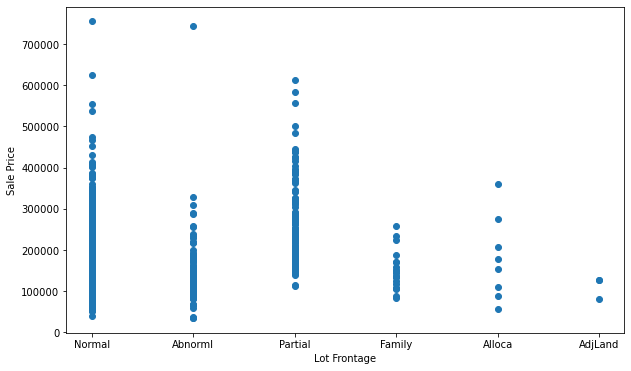

In [7]:
#clearly see there are some outliers that may need to be dropped or salesprice could be normalized 

fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(x=train.SaleCondition, y = train['SalePrice'])
plt.xlabel("Lot Frontage")
plt.ylabel("Sale Price")
plt.show()

In [8]:
train.SalePrice.describe()

count      1412.000000
mean     182507.021955
std       79270.416057
min       34900.000000
25%      131475.000000
50%      164600.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
train[train['SalePrice']>500000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
173,20,RL,63.0,17423,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,60,0,0,0,none,7,2009,New,Partial,501837
427,20,RL,105.0,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,72,0,0,170,none,4,2009,WD,Normal,555000
671,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,50,0,0,0,none,1,2007,WD,Normal,755000
746,60,RL,47.0,53504,Pave,IR2,HLS,AllPub,CulDSac,Mod,...,36,0,0,210,none,6,2010,WD,Normal,538000
779,60,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,170,0,0,192,none,1,2009,New,Partial,582933
871,20,RL,100.0,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,67,0,0,0,none,3,2010,New,Partial,611657
1010,60,RL,85.0,16056,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,108,0,0,0,none,7,2006,New,Partial,556581
1130,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,76,0,0,0,none,7,2006,WD,Normal,625000
1142,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,78,0,0,0,MnPrv,7,2007,WD,Abnorml,745000


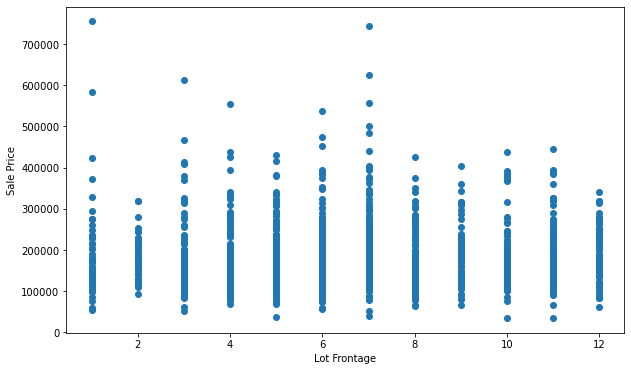

In [10]:
fig,ax = plt.subplots(figsize=(10,6))

ax.scatter(x=train.MoSold, y = train['SalePrice'])
plt.xlabel("Lot Frontage")
plt.ylabel("Sale Price")
plt.show()

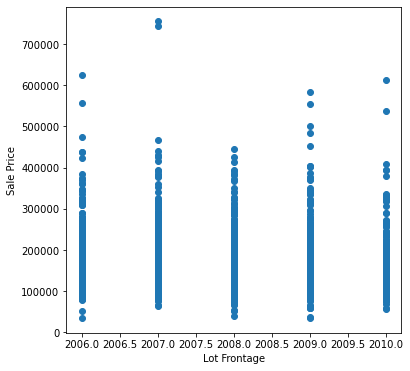

In [11]:

fig,ax = plt.subplots(figsize=(6,6))

ax.scatter(x=train.YrSold, y = train['SalePrice'])
plt.xlabel("Lot Frontage")
plt.ylabel("Sale Price")
plt.show()

In [12]:
train['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [13]:
#columns with quality that I'll want to label encode 
quals = train.filter(like='Q').select_dtypes(exclude=['number'])
quals

,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageQual
0,Gd,Gd,Ex,Gd,none,TA
1,TA,Gd,Ex,TA,TA,TA
2,Gd,Gd,Ex,Gd,TA,TA
3,TA,TA,Gd,Gd,Gd,TA
4,Gd,Gd,Ex,Gd,TA,TA
...,...,...,...,...,...,...
1407,TA,Gd,Ex,TA,TA,TA
1408,TA,Gd,TA,TA,TA,TA
1409,Ex,TA,Ex,Gd,Gd,TA
1410,TA,TA,Gd,Gd,none,TA


In [14]:
cond = train.filter(like='Cond').select_dtypes(exclude=['number'])
cond = cond[['ExterCond','BsmtCond','GarageCond']]
cond

,ExterCond,BsmtCond,GarageCond
0,TA,TA,TA
1,TA,TA,TA
2,TA,TA,TA
3,TA,Gd,TA
4,TA,TA,TA
...,...,...,...
1407,TA,TA,TA
1408,TA,TA,TA
1409,Gd,Gd,TA
1410,TA,TA,TA


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [16]:
condition=cond.columns.tolist()
quality=quals.columns.tolist()
cq_list= condition + quality 
cq_list

['ExterCond',
 'BsmtCond',
 'GarageCond',
 'ExterQual',
 'BsmtQual',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual']

In [17]:
d=cond['ExterCond']
d=le.fit_transform(d)
d

array([4, 4, 4, ..., 2, 4, 4])

In [18]:

for col in condition: 
    x=cond[col]
    label=le.fit_transform(x)
    cond.drop(columns=col, inplace=True)
    #label = label.add_prefix(col+"_")
    cond[col] = label
cond

,ExterCond,BsmtCond,GarageCond
0,4,3,4
1,4,3,4
2,4,3,4
3,4,1,4
4,4,3,4
...,...,...,...
1407,4,3,4
1408,4,3,4
1409,2,1,4
1410,4,3,4


In [19]:


for col in quality: 
    x=quals[col]
    label=le.fit_transform(x)
    quals.drop(columns=col, inplace=True)
    #label = label.add_prefix(col+"_")
    quals[col] = label
quals

,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageQual
0,2,2,0,2,5,4
1,3,2,0,3,4,4
2,2,2,0,2,4,4
3,3,3,2,2,2,4
4,2,2,0,2,4,4
...,...,...,...,...,...,...
1407,3,2,0,3,4,4
1408,3,2,4,3,4,4
1409,0,3,0,2,2,4
1410,3,3,2,2,5,4


In [20]:
cond_qual=pd.concat([cond, quals],axis=1)
cond_qual

,ExterCond,BsmtCond,GarageCond,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageQual
0,4,3,4,2,2,0,2,5,4
1,4,3,4,3,2,0,3,4,4
2,4,3,4,2,2,0,2,4,4
3,4,1,4,3,3,2,2,2,4
4,4,3,4,2,2,0,2,4,4
...,...,...,...,...,...,...,...,...,...
1407,4,3,4,3,2,0,3,4,4
1408,4,3,4,3,2,4,3,4,4
1409,2,1,4,0,3,0,2,2,4
1410,4,3,4,3,3,2,2,5,4


In [21]:
train.drop(columns=cq_list,inplace=True)
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,none,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,none,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,none,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,none,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,none,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,none,8,2007,WD,Normal,175000
1408,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,MnPrv,2,2010,WD,Normal,210000
1409,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,GdPrv,5,2010,WD,Normal,266500
1410,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,none,4,2010,WD,Normal,142125


In [22]:
train_2=pd.concat([train, cond_qual], axis = 1)
train_2.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SalePrice,ExterCond,BsmtCond,GarageCond,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu,GarageQual
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,208500,4,3,4,2,2,0,2,5,4
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,181500,4,3,4,3,2,0,3,4,4
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,223500,4,3,4,2,2,0,2,4,4
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,140000,4,1,4,3,3,2,2,2,4
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,250000,4,3,4,2,2,0,2,4,4


In [ ]:
train_3 

In [23]:
train_str=train_2.select_dtypes(exclude=['number'])
train_str

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,none,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,none,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,none,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,GasA,Y,SBrkr,Typ,Detchd,Unf,Y,none,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,none,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,none,WD,Normal
1408,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,GasA,Y,SBrkr,Min1,Attchd,Unf,Y,MnPrv,WD,Normal
1409,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,GasA,Y,SBrkr,Typ,Attchd,RFn,Y,GdPrv,WD,Normal
1410,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,GasA,Y,FuseA,Typ,Attchd,Unf,Y,none,WD,Normal


In [24]:
str_list=train_str.columns.tolist()

In [25]:
for col in str_list: 
    x=train_str[col]
    label=le.fit_transform(x)
    train_str.drop(columns=col, inplace=True)
    #label = label.add_prefix(col+"_")
    train_str[col] = label
train_str

C:\Users\Public\Downloads\Anaconda\envs\PythonAdv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\Public\Downloads\Anaconda\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Heating,CentralAir,Electrical,Functional,GarageType,GarageFinish,PavedDrive,Fence,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,0,1,4,6,1,1,2,4,8,4
1,3,1,3,3,0,2,0,24,1,2,...,0,1,4,6,1,1,2,4,8,4
2,3,1,0,3,0,4,0,5,2,2,...,0,1,4,6,1,1,2,4,8,4
3,3,1,0,3,0,0,0,6,2,2,...,0,1,4,6,5,2,2,4,8,0
4,3,1,0,3,0,2,0,15,2,2,...,0,1,4,6,1,1,2,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,3,1,3,3,0,4,0,8,2,2,...,0,1,4,6,1,1,2,4,8,4
1408,3,1,3,3,0,4,0,14,2,2,...,0,1,4,2,1,2,2,2,8,4
1409,3,1,3,3,0,4,0,6,2,2,...,0,1,4,6,1,1,2,0,8,4
1410,3,1,3,3,0,4,0,12,2,2,...,0,1,0,6,1,2,2,4,8,4


In [26]:
for col in str_list:
    one_hot = pd.get_dummies(train_str[col])
    train_str.drop(columns=[col], inplace=True)
    one_hot = one_hot.add_prefix(col + '_')
    train_str=train_str.join(one_hot)
    

train_str 
    

C:\Users\Public\Downloads\Anaconda\envs\PythonAdv\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,Street_1,LotShape_0,LotShape_1,LotShape_2,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1408,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1409,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1410,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [38]:
fresh = pd.read_csv('Resources/train_allvalues.csv')
fresh

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,none,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,none,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,none,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,none,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,8,2007,WD,Normal,175000
1408,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1409,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500
1410,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,none,0,4,2010,WD,Normal,142125


In [39]:
fresh_2 = fresh.drop(columns = str_list)
fresh_2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,Gd,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,TA,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,Gd,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,TA,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,Gd,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,1456,60,62.0,7917,6,5,1999,2000,0.0,TA,...,0,40,0,0,0,0,0,8,2007,175000
1408,1457,20,85.0,13175,6,6,1978,1988,119.0,TA,...,349,0,0,0,0,0,0,2,2010,210000
1409,1458,70,66.0,9042,7,9,1941,2006,0.0,Ex,...,0,60,0,0,0,0,2500,5,2010,266500
1410,1459,20,68.0,9717,5,6,1950,1996,0.0,TA,...,366,0,112,0,0,0,0,4,2010,142125


In [40]:
fresh_3 = fresh_2.drop(columns = cq_list)


In [42]:
fresh_3.drop(columns=['Id','MiscVal','PoolArea'], inplace=True)

In [44]:
fresh_3.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

In [54]:
fresh_3_select = fresh_3.drop(columns = ['OverallCond', 'OverallQual'])

In [55]:
encoded = pd.concat([train_str,cond_qual], axis =1)

trained = pd.concat([encoded, fresh_3_select], axis =1)

In [56]:
trained

,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,Street_1,LotShape_0,LotShape_1,LotShape_2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,1,0,0,0,...,2,548,0,61,0,0,0,2,2008,208500
1,0,0,0,1,0,0,1,0,0,0,...,2,460,298,0,0,0,0,5,2007,181500
2,0,0,0,1,0,0,1,1,0,0,...,2,608,0,42,0,0,0,9,2008,223500
3,0,0,0,1,0,0,1,1,0,0,...,3,642,0,35,272,0,0,2,2006,140000
4,0,0,0,1,0,0,1,1,0,0,...,3,836,192,84,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,0,0,0,1,0,0,1,0,0,0,...,2,460,0,40,0,0,0,8,2007,175000
1408,0,0,0,1,0,0,1,0,0,0,...,2,500,349,0,0,0,0,2,2010,210000
1409,0,0,0,1,0,0,1,0,0,0,...,1,252,0,60,0,0,0,5,2010,266500
1410,0,0,0,1,0,0,1,0,0,0,...,1,240,366,0,112,0,0,4,2010,142125


In [57]:

trained.to_csv("Resources/preprocess_df.csv",index=False)